In [1]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName("WordCount").getOrCreate()

In [3]:
data = ["Big data is the future of technology", "Apache spark makes big data processing faster","Google colab, colab google, Google , Google "]
rdd=spark.sparkContext.parallelize(data)


In [4]:
rdd.flatMap(lambda line: line.split("")).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b)

PythonRDD[5] at RDD at PythonRDD.scala:53

In [5]:
word_counts=rdd.flatMap(lambda line: line.split(" ")).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b)

In [6]:
word_count_df=word_counts.toDF(["Word","Count"])

In [7]:
word_count_df.show()

+----------+-----+
|      Word|Count|
+----------+-----+
|       Big|    1|
|    future|    1|
|        of|    1|
|technology|    1|
|       big|    1|
|    faster|    1|
|     colab|    1|
|   google,|    1|
|          |    1|
|      data|    2|
|        is|    1|
|       the|    1|
|    Apache|    1|
|     spark|    1|
|     makes|    1|
|processing|    1|
|    Google|    3|
|    colab,|    1|
|         ,|    1|
+----------+-----+



In [9]:
word_count_pd = word_count_df.toPandas()

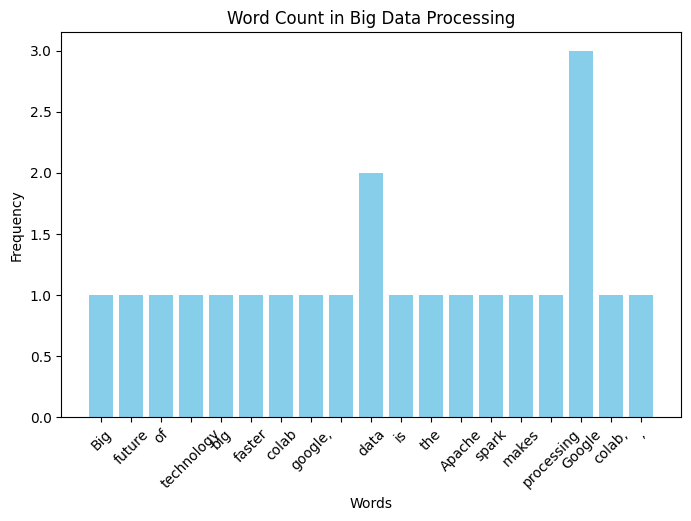

In [10]:
plt.figure(figsize=(8,5))
plt.bar(word_count_pd["Word"], word_count_pd["Count"], color='skyblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Count in Big Data Processing")
plt.xticks(rotation=45)
plt.show()

In [11]:
spark.stop()